## **HOMEWORK 2**

Carmit Mordechai and Iyar Hadad


## **Theory Questions**

<b>1 Question:</b> 
To evaluate how well our model performs at T1D classification, we need to have evaluation
metrics that measures of its performances/accuracy. Which evaluation metric is more
important to us: model accuracy or model performance? Give a simple example that
illustrates your claim.

<b> 1 Answer:</b> 
The most important for us is the model accuracy because we deal with binary medical dataset where data points ("YES" and "NO") are approximately equal for both the classes. So we have reliable accuracy that is defined as the ratio of number of correct predictions divided by the total number of predictions.
If data would be imbalanced, for instance, in cases of rare diseases when the data is not divided equally between those who are positive and those who don’t, accuracy metric model performs improperly the model. 
In addition, in our model a precise diagnostic analysis for whether or not the patient in positive or negative to 1TD is very important. T1D has no cure but, but the consequences of these disease are in the long-term which can cause heart disease, stroke, kidney failure etc. Therefore, we have to be accurate to prevent those complications.

Additional way investigating our data is by performance metric model - confusion matrix which included the measures of: true positive (TP), true negative (TN), false negative (FN), and false positive (FP). 
Regarding on these measures we can calculate: F1 score, Sensitivity (Se), Specificity (Sp), PPV and NPV. For example, F1 score can be more precise for imbalance model because it gives different weightage to Se and PPV according to our model.



<b> 2 Question:</b> T1D is often associated with other comorbidities such as a heart attack. You are asked to
design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant
patient features for the algorithm may include blood pressure (BP), body-mass index (BMI),
age (A), level of physical activity (P), and income (I). You should choose between two
classifiers: the first uses only BP and BMI features and the other one uses all of the features
available to you. Explain the pros and cons of each choice.





<b> 2 Answer:</b> <b>The selection uses only BP and BMI features:</b> We assume that we know that both BP and BMI have high correlation to heart attack:

   <u>The pros:</u>

    1) Reduce overfitting: we use less data means less redundant data so that we have less opportunities to 
       make decisions based on unreliable information.
    2) Improves Accuracy: Less misleading data means better modeling accuracy.
    3) Reduces Training Time: fewer features reduce algorithm complexity and algorithms train faster, so that
       we can save money.

   <u>The cols:</u>

    1) Loss information: We don’t use enough Data to be based on. For instance, the increasing of blood 
       pressure regarding to the age can be highly affective, in older adults heart attack is more dangerous 
       than in young persons. So we have to take it into account when we classify whether or not the patient 
       suffers from heart attack. Can be a good idea to use "Susceptive" label so we can keep watching him and 
       give him the correct treatment which can avoid heart attack later on.            

<b>Uses all of the features available:</b> 
   The advantage is that we maintain information (intensity) - the col of using only 2 featured that we mentioned above.

   <u>The cols:</u>
   
    1) More features mean higher dimension of data, which adds complexity that can lead to overfitting 
    2) Increases Training Time: It takes a lot of time to run the model.
    3) Reduces accuracy:  our model cab be relied on redundant data.



<b> 3 Question:</b> A histologist wants to use machine learning to tell the difference between pancreas biopsies
that show signs of T1D and those that do not. She has already come up with dozens of
measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which
model to use. The biopsies are really similar, and it is difficult to distinguish them from the
human eye, or by just looking at the features. Which of the following is better: logistic
regression, linear SVM or nonlinear SVM? Explain your answer.

<b> 3 Answer:</b> We would offer the histologist to use Non Linear SVM because the biopsies are very similar so that it is 
     difficult to distinguish between the different features we can conclude that the data is not linear separable.  Both Linear SVM and Logistic Regression are based on a data that is linear separable, therefor they do not fit 
     this model.  


<b> Question 4:</b> What are the differences between LR and linear SVM and what is the difference in the
effect/concept of their hyper-parameters tuning?

<b> Answer 4:</b> The difference between Logistic Regression and SVM is that:

<b>LR</b> – is applied on classification problems when hypothesis is estimated probability and the output label is categorical whether something happens or not, it takes a value number and map it to a value between 0 and 1, but never exactly at those limits.


<b>SVM</b> – is applied on both classification and regression problems this algorithm uses geometry interpretation based on a line (1D) or hyperplane (2D), a decision boundary that maximizes the margin (the distance between the line and the support vectors). It uses different "kernel tricks" such as: linear, and non-linear – polynomial and RBF.  

<u>The summary and additional main differences between SVM and Logistic Regression:<u>

• SVM is relied on the “best” margin that reduces the risk of error on the data, whereas logistic regression has different decision boundaries with different weights that are close to the optimal point.

• There is less risk of overfitting in SVM, while Logistic regression is very sensitive to overfitting.

   <u>SVM Hyperparameters:</u> 
   
C – 1 /λ – indicates the penalty value so it behaves as a regularization parameter in the SVM. The C parameter is a tradeoff between correct classification of training sets and maximization of the margin. The bigger C is the smaller margin will be accepted, that we get if the decision function is better at classifying all training points, while, a smaller C means a larger margin we get. Therefore, a simpler decision function, on account of training accuracy. 

Γ – gamma – indicates the fitting to the training data. When gamma is very high the influence of a single training is very 'close' whereas 'far' means that gamma is very low. Gamma can be represented by the inverse of the radius of influence of samples selected by the model - support vectors.

   <u>LG Hyperparameters:</u>
    
λ - lambda is a parameter which indicates the degree of regularization. Setting lambda to 0 means no regularization, whereas large values of lambda leads to regularization. Lambda is usually set using cross validation. Regularization help us selecting a tradeoff between high variance – overfitting and high bias under-fitting.




In [839]:
# Imports
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use(['ggplot']) 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.model_selection import StratifiedKFold as SKFold
import sys
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



First we look on the data and check for missing values and drop them

## **Question 1**

In [870]:
def nan2num_samp(data,feat_idx):
    pd.options.mode.chained_assignment = None
    c_cdf = data.copy()

    for col_idx, col in enumerate(c_cdf):
        if col_idx in feat_idx:
              
            c_cdf[col][c_cdf[col]=="Yes"] = 1
            c_cdf[col][c_cdf[col]=="No"] = 0
            dic = c_cdf[col].to_dict()
            vals = np.fromiter(dic.values(), dtype=float)
            not_nan_values = vals[~np.isnan(vals)]
            new_col_vals =[np.random.choice(not_nan_values) if np.isnan(k) else k for k in vals]
            c_cdf[col] = new_col_vals
            c_cdf[col][c_cdf[col]==1] = "Yes"
            c_cdf[col][c_cdf[col]==0] = "No"

    return pd.DataFrame(c_cdf)

In [871]:
df = pd.read_csv("HW2_data.csv")
# print(df.head(5))
print("checking Nan in columns:")
df.info() 
df.iloc[:, [3,4,6,7,9,13]] # check values in columns with Nan
df_clean = df.copy()
df_clean = nan2num_samp(df,[3,4,6,7,9,13]) # replace nan with random values from the data
print("checking replacing Nan influence:")
df_clean.info()
print("by dropping nan we could have lost "+ str(len(df)-len(df.copy().dropna())) +" rows")
# define data features and data labels
Y = df_clean[['Diagnosis']]
X = pd.concat([df_clean.iloc[:,0:df_clean.columns.get_loc("Diagnosis")],df_clean.iloc[:,df_clean.columns.get_loc("Diagnosis")+1:]], axis= 1)

checking Nan in columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-nul

We can see the data is based on Yes and No except the columns "Age" and "Gender". There were some Nans and we decided to drop them away.
Now we can split the data to 20% rest and 80% train.

#  **Question 2**

In [842]:
# split to test and train 20:80
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), test_size=0.2, random_state=10, stratify=Y)

# **Question 3**

In [843]:
Train_Test_dif = {'Feature':[],'Train (%)':[],'Test (%)':[],'Delta (%)':[]} 
Train_Test_dif_age = {'Feature':[],'Train mean':[],'Test mean':[],'Train std':[],'Test std':[]}
for feature_x_train, feature_x_test in zip(X_train, X_test):
    if feature_x_train == 'Age':
        Train_Test_dif_age['Feature'].append(feature_x_train)
        Train_Test_dif_age['Train mean'].append(np.mean(X_train[feature_x_train]))
        Train_Test_dif_age['Train std'].append(np.std(X_train[feature_x_train]))
        Train_Test_dif_age['Test mean'].append(np.mean(X_test[feature_x_test]))
        Train_Test_dif_age['Test std'].append(np.std(X_test[feature_x_test]))

    else:
        train_value_count = X_train[feature_x_train].value_counts()
        test_value_count = X_test[feature_x_test].value_counts()
        Train_Test_dif['Feature'].append(feature_x_train)
        Train_percent = 100 * np.divide(np.array(train_value_count)[0], sum(np.array(train_value_count)))
        Test_percent = 100 * np.divide(np.array(test_value_count)[0], sum(np.array(test_value_count)))

        Train_Test_dif['Train (%)'].append(Train_percent)
        Train_Test_dif['Test (%)'].append(Train_percent)
        Train_Test_dif['Delta (%)'].append(Train_percent - Test_percent)

df_train_test_dif = pd.DataFrame.from_dict(Train_Test_dif,orient='columns')
df_train_test_dif_age = pd.DataFrame.from_dict(Train_Test_dif_age,orient='columns')
df_train_test_dif.head(len(df_train_test_dif))


,Feature,Train (%),Test (%),Delta (%)
0,Gender,62.610619,62.610619,-5.530973
1,Increased Urination,51.548673,51.548673,-0.663717
2,Increased Thirst,55.752212,55.752212,1.769912
3,Sudden Weight Loss,59.513274,59.513274,1.106195
4,Weakness,55.752212,55.752212,-7.079646
5,Increased Hunger,55.973451,55.973451,1.991150
6,Genital Thrush,78.761062,78.761062,6.194690
7,Visual Blurring,55.752212,55.752212,3.539823
8,Itching,51.769912,51.769912,0.442478
9,Irritability,77.433628,77.433628,4.867257


In [844]:
df_train_test_dif_age.head(len(df_train_test_dif_age))

,Feature,Train mean,Test mean,Train std,Test std
0,Age,48.575221,46.548673,12.467342,11.383104


We can see there is no big difference in the delta between train and test and also same mean and std ages, therefore we can say there is a train-test balance.

**ai. What issues could an imbalance of features between train and test cause?**

**aii. How could you solve the issue?**

a1. The model studies the train according to the data train which is not very similar to the test imbalance of the features between train and test will cause bad classification because the model could not recognize the features values from the train in the test.

a2. because of the data is based on "Yes" or "No"  in order to make sure that we have balance between test and train we can divide the data useing more accurate function.

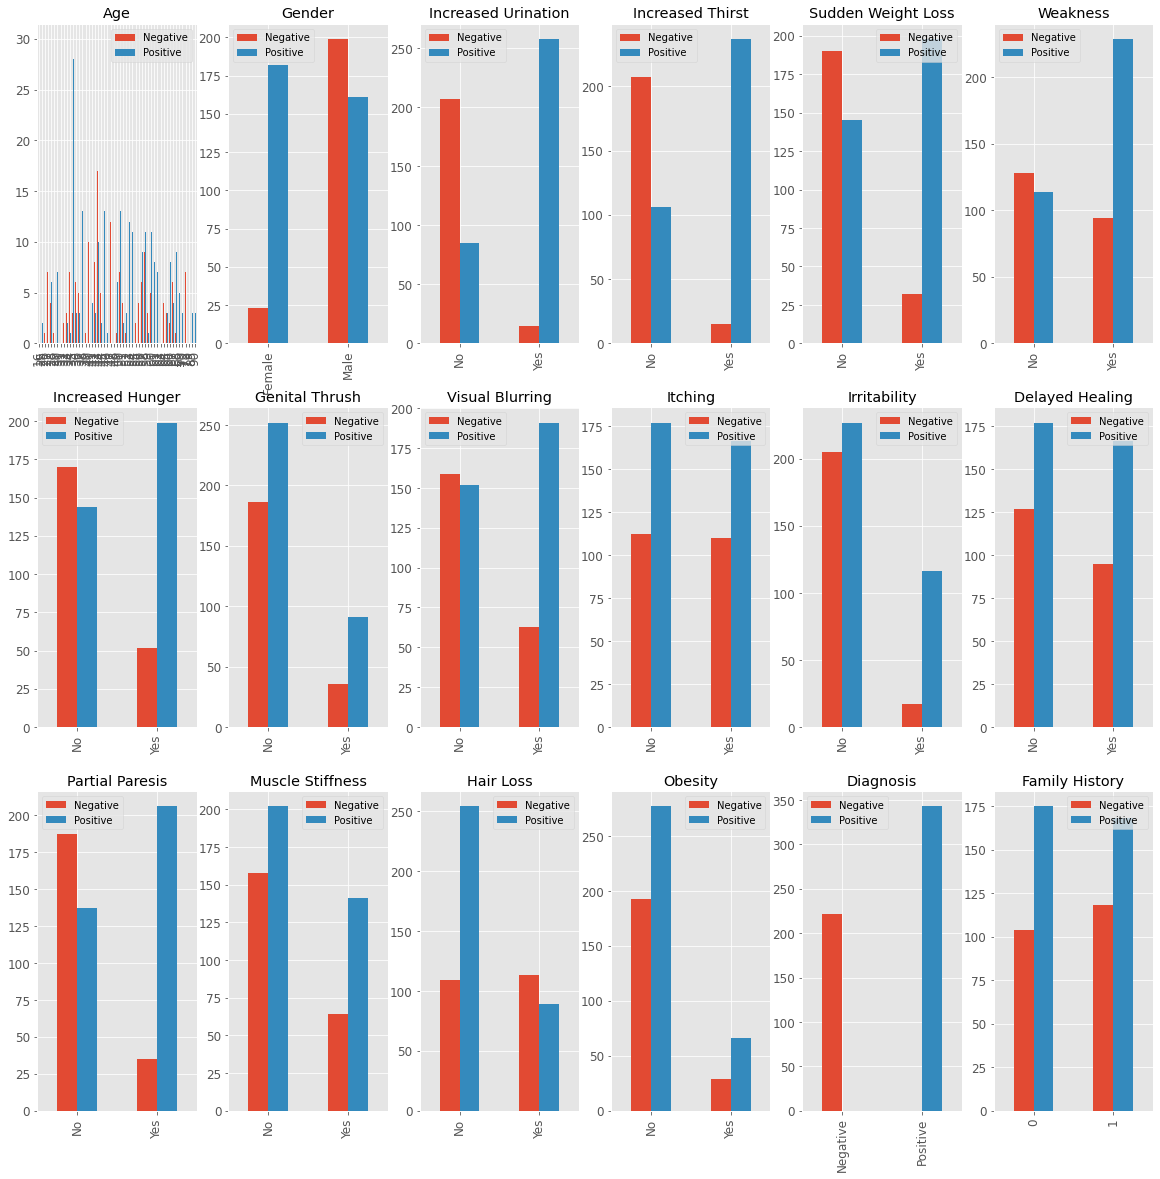

In [845]:
fig,axs = plt.subplots(3,6,figsize=(20,20))
i=0
j=0
for feat in df_clean:
    positive = df_clean.loc[df_clean['Diagnosis']=="Positive"]
    negative = df_clean.loc[df_clean['Diagnosis']=="Negative"]
    feature_p = positive[feat].value_counts()
    feature_n = negative[feat].value_counts()
    dic={}
    dic['Negative']=feature_n
    dic['Positive']=feature_p
    dicc=pd.DataFrame.from_dict(dic)
    dicc.plot(ax=axs[i,j],kind="bar",title = feat)
    j+=1
    if j==6:
        i+=1
        j=0



 **i. Was there anything unexpected?**
 
**ii. Are there any features that you feel will be particularly important to your**
**model? Explain why.**

i.  As we have considered T1D, a disease that causes uncontrolled blood glucose levels, we haven’t think that increased urination and increased thirst are very important issues that indicate T1D.

ii. The 2 features that are particularly important to our model are: "Increased Urination" and "Increased Thirst". As we can see from the graphs above the differences between the diagnostic classification of a patient to be positive with increased urination and with increased thirst are the highest, so if he is positive to these features he has the highest chance to be positive to 1TD as well.  

Now we decided to add additional plot of the most important features - Increased urination and Increased thirst in the train and test groups, to make sure there is balance specifically in these features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027871A89790>,
      dtype=object)

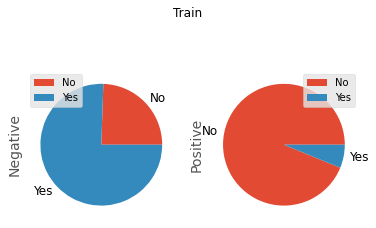

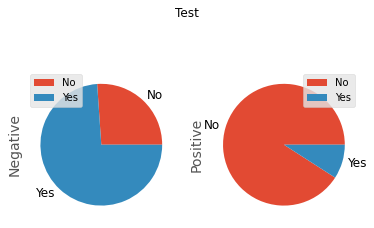

In [846]:
positive = X_train.loc[y_train=="Positive"]
negative = X_train.loc[y_train=="Negative"]
feature_p = positive['Increased Urination'].value_counts()
feature_n = negative['Increased Thirst'].value_counts()
dic_best_train={}
dic_best_train['Negative']=feature_p
dic_best_train['Positive']=feature_n
dic_best_train=pd.DataFrame.from_dict(dic_best_train)

positive = X_test.loc[y_test=="Positive"]
negative = X_test.loc[y_test=="Negative"]
feature_p = positive['Increased Urination'].value_counts()
feature_n = negative['Increased Thirst'].value_counts()
dic_best_test={}
dic_best_test['Negative']=feature_p
dic_best_test['Positive']=feature_n
dic_best_test=pd.DataFrame.from_dict(dic_best_test)

dic_best_train.plot(kind="pie",subplots=True,title = 'Train')
dic_best_test.plot(kind="pie",subplots=True,title = 'Test')

We can see a good balance in the features

#  **Question 4**

In [847]:
one_hot = X_train.copy().values

for feat in range(17):
    if feat == 0:
        continue
    elif feat == 1:
        one_hot[:,feat]=1*(one_hot[:,feat]=="Male")
    else:
        one_hot[:,feat]=1*(one_hot[:,feat]=="Yes")


X_train_0_1 = one_hot

one_hot = X_test.copy().values
for feat in range(17):
    if feat == 0:
        continue
    elif feat == 1:
        one_hot[:,feat]=1*(one_hot[:,feat]=="Male")
    else:
        one_hot[:,feat]=1*(one_hot[:,feat]=="Yes")
X_test_0_1 = one_hot


y_train_0_1 = 1 * (y_train=='Positive')
y_test_0_1 = 1 * (y_test=='Positive')


#  **Question 5**

In this part we build some different models to claaify our data.

**linear models:**

First we will build LogisticRegression model, and try to choose the best lambda value.

In [848]:
def check_penalty(penalty='none'):
    if penalty == 'l1':
        solver='liblinear'
    if penalty == 'l2' or penalty == 'none':
        solver='lbfgs'
    return solver

8/8 lambda values, processed folds: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 119.32it/s]


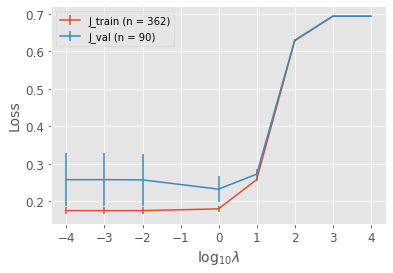

In [875]:
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
n_splits = 5

skf = SKFold(n_splits=n_splits, random_state=10, shuffle=True)

J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))
pen = 'l2' # we check and saw 'l2' performs better than 'l1'
solver = check_penalty(penalty=pen)
max_iter = 2000
for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    #--------------------------Impelment your code here:-------------------------------------
    log_reg = LogisticRegression(random_state=5, penalty=pen, C = C, max_iter=max_iter,solver=solver)
    #----------------------------------------------------------------------------------------
    with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
        h = 0 # index per split per lambda
        J_train_fold = np.zeros(n_splits)
        J_val_fold = np.zeros(n_splits)
        for train_index, val_index in skf.split(X_train_0_1, y_train_0_1):
            pbar.set_description('%d/%d lambda values, processed folds' % ((1 + idx), len(lmbda)))
            pbar.update()
            #--------------------------Impelment your code here:-------------------------------------
            x_train_fold, x_val_fold = X_train_0_1[train_index,:], X_train_0_1[val_index,:]
            y_train_fold, y_val_fold = y_train_0_1[train_index], y_train_0_1[val_index]
            x_train_fold= scaler.fit_transform(x_train_fold)
            x_val_fold = scaler.transform(x_val_fold)
            log_reg.fit(x_train_fold, y_train_fold)
            y_pred_train = log_reg.predict_proba(x_train_fold)
            J_train_fold[h] = log_loss(y_train_fold,y_pred_train)
            y_pred_val = log_reg.predict_proba(x_val_fold)
            J_val_fold[h] = log_loss(y_val_fold,y_pred_val)

            #----------------------------------------------------------------------------------------
            h += 1
        #--------------------------Impelment your code here:-------------------------------------
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

        #----------------------------------------------------------------------------------------
plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:])
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])
plt.show()



We choose the best labmda as 1, and now let's train the model with 5k cross validation

Test loss is 3.97
*** NO SCALER ***
Sensitivity is 0.90. 
Specificity is 0.86. 
PPV is 0.91. 
NPV is 0.84. 
Accuracy is 0.88. 
F1 is 0.91. 
AUROC is 0.96
----------------------------------------------
Test scaler loss is 2.75
*** SCALER ***
Sensitivity is 0.94. 
Specificity is 0.89. 
PPV is 0.93. 
NPV is 0.91. 
Accuracy is 0.92. 
F1 is 0.94. 
AUROC is 0.96


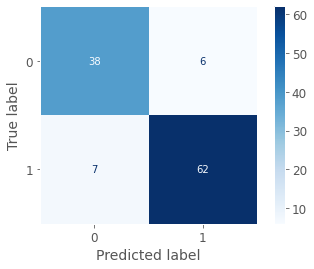

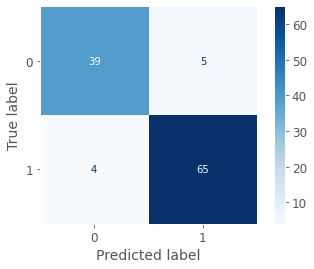

In [877]:
best_lmbda  = 1 
max_iter =2000
olver='lbfgs'
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_auc_score
log_reg = LogisticRegression(random_state=5, penalty=pen, C = 1/best_lmbda, max_iter=max_iter,solver=solver)
log_reg.fit(X_train_0_1, y_train_0_1)
y_pred_test = log_reg.predict(X_test_0_1)
y_pred_proba_test = log_reg.predict_proba(X_test_0_1)
plot_confusion_matrix(log_reg, X_test_0_1,y_test_0_1, cmap=plt.cm.Blues)
plt.grid(False)
print("Test loss is {:.2f}".format(log_loss(y_test,y_pred_test)))
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

TN = calc_TN(y_test_0_1, y_pred_test)
FP = calc_FP(y_test_0_1, y_pred_test)
FN = calc_FN(y_test_0_1, y_pred_test)
TP = calc_TP(y_test_0_1, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print("*** NO SCALER ***")
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
print("----------------------------------------------")

#scaler
scaler = StandardScaler()
x_tr = scaler.fit_transform(X_train_0_1)
x_tst = scaler.transform(X_test_0_1)
log_reg.fit(x_tr, y_train_0_1)
y_pred_test = log_reg.predict(x_tst )
y_pred_proba_test = log_reg.predict_proba(x_tst )
plot_confusion_matrix(log_reg,x_tst,y_test_0_1, cmap=plt.cm.Blues)
plt.grid(False)
print("Test scaler loss is {:.2f}".format(log_loss(y_test,y_pred_test)))

#--------------------------Impelment your code here:-------------------------------------
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

TN = calc_TN(y_test_0_1, y_pred_test)
FP = calc_FP(y_test_0_1, y_pred_test)
FN = calc_FN(y_test_0_1, y_pred_test)
TP = calc_TP(y_test_0_1, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print("*** SCALER ***")
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
#-----------------------------------------------------------------------------------------
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))



We can see scalarization is better for the data. From now on we will use scaled values.

**Nonlinear models:**

Now we will build a nonlinear SVM model, and for that we will try different values of C

In [890]:
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
C = np.array([1, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_0_1, y_train_0_1)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.981, test=0.901), f1=(train=0.984, test=0.917), precision=(train=0.995, test=0.926), recall=(train=0.973, test=0.909), roc_auc=(train=0.994, test=0.975), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.978, test=0.945), f1=(train=0.982, test=0.954), precision=(train=0.977, test=0.963), recall=(train=0.986, test=0.945), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.981, test=0.944), f1=(train=0.984, test=0.955), precision=(train=0.986, test=0.946), recall=(train=0.982, test=0.964), roc_auc=(train=0.999, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.972, test=0.956), f1=(train=0.977, test=0.962), precision=(train=0.991, test=1.000), recall=(train=0.964, test=0.926), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.986, test=0.912), f1=(train=0.989, test=0.927), precision=(train=0.995, test=0.927), recall=(train=0.982, test=0.927), roc_auc=(train=0.999, test=0.978), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.981, test=0.945), f1=(train=0.984, test=0.954), precision=(train=0.982, test=0.963), recall=(train=0.986, test=0.945), roc_auc=(train=0.999, test=0.994), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, s

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': array([   1,  100, 1000]),
                         'svm__degree': [3], 'svm__gamma': ['auto', 'scale'],
                         'svm__kernel': ['rbf', 'poly']},
             refit='roc_auc', return_train_score=True,
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In order to choose the best C we will visualize their different results

In [891]:
def plot_radar(clf, clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    fig=plt.figure(figsize=(18,14))
    if 'svm__gamma' in cv_dict[0]:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0] and item["svm__gamma"] == clf_type[1]]
    else:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0]]
    for idx, val in enumerate(new_list):
        ax = fig.add_subplot(1, len(new_list), 1+idx, polar=True)
        rel_idx, rel_dict = val
        stats_train = score_mat_train[:, rel_idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, rel_idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        if idx == 0:
            ax.set_ylabel(clf_type[0], fontsize=18)
        ax.set_title('C = %.3f' % (rel_dict['svm__C']))
        if 'svm__gamma' in cv_dict[0]:
            ax.set_xlabel('$\gamma = %s $' % (rel_dict['svm__gamma']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
        
    plt.show()



{'svm__C': 1, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


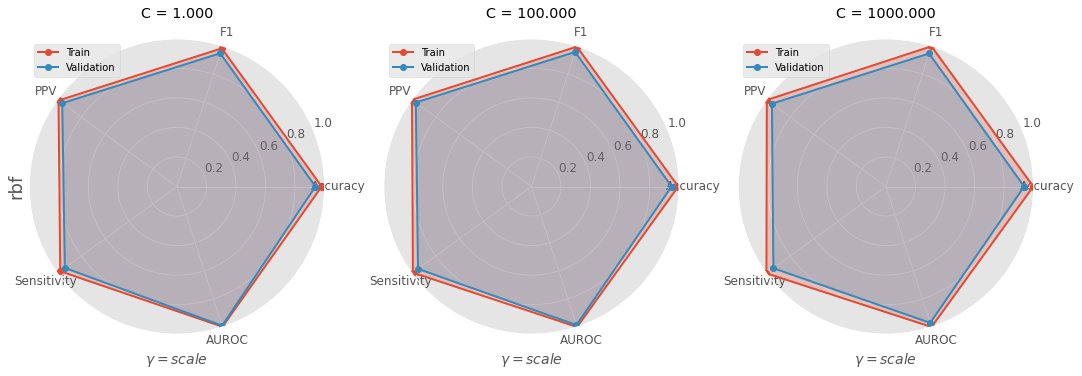

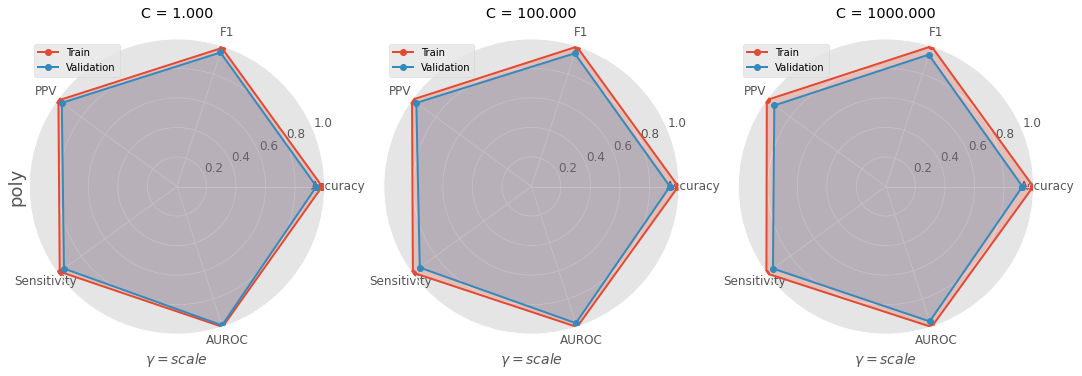

In [892]:
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

clf_type = ['rbf', 'scale']
plot_radar(svm_nonlin, clf_type)
clf_type = ['poly', 'scale']
plot_radar(svm_nonlin, clf_type)



We will choose C=1 and kernel to be rbf.

In [893]:
best_svm_nonlin = svm_nonlin.best_estimator_
y_pred_test = best_svm_nonlin.predict(X_test_0_1)
y_pred_proba_test = best_svm_nonlin.predict_proba(X_test_0_1)


*** svm_nonlin ***
Sensitivity is 0.93. 
Specificity is 0.95. 
PPV is 0.97. 
NPV is 0.89. 
Accuracy is 0.94. 
F1 is 0.95. 
AUROC is 1.00


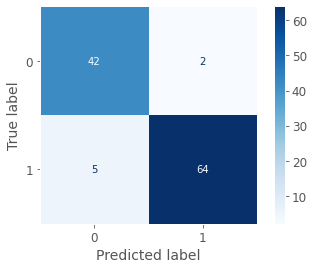

In [894]:
plot_confusion_matrix(best_svm_nonlin, X_test_0_1,y_test_0_1, cmap=plt.cm.Blues)
plt.grid(False)


calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

TN = calc_TN(y_test_0_1, y_pred_test)
FP = calc_FP(y_test_0_1, y_pred_test)
FN = calc_FN(y_test_0_1, y_pred_test)
TP = calc_TP(y_test_0_1, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print("*** svm_nonlin ***")
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

**What performs best on this dataset? Linear or non-linear models?**

The Logistic regression linear model results were: 
Accuracy is 0.92. 
F1 is 0.94. 
AUROC is 0.96

The nonlinear SVM results were: 
Accuracy is 0.94. 
F1 is 0.95. 
AUROC is 1.00

which means the nonlinear performs better.

#  **Question 6**
In this part we will run a Random Forest Network to explore feature importance

Sensitivity is 0.97. 
Specificity is 0.98. 
PPV is 0.99. 
NPV is 0.96. 
Accuracy is 0.97. 
F1 is 0.98. 
AUROC is 0.998
The score on the test set with Random Forest preprocessing is 0.97


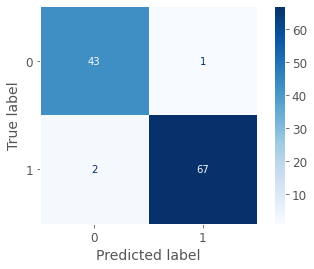

In [897]:
rfc = RandomForestClassifier()
rfc.fit(x_tr, y_train_0_1)
w = rfc.feature_importances_


y_pred_test = rfc.predict(x_tst) 
y_pred_proba_test = rfc.predict_proba(x_tst)
plot_confusion_matrix(rfc,x_tst,y_test_0_1, cmap=plt.cm.Blues)
plt.grid(False)

TN = calc_TN(y_test_0_1, y_pred_test)
FP = calc_FP(y_test_0_1, y_pred_test)
FN = calc_FN(y_test_0_1, y_pred_test)
TP = calc_TP(y_test_0_1, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
print('Sensitivity is {:.2f}. \nSpecificity is {:.2f}. \nPPV is {:.2f}. \nNPV is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(Se,Sp,PPV,NPV,Acc,F1))

#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test_0_1, y_pred_proba_test[:,1])))
print('The score on the test set with Random Forest preprocessing is {:.2f}'.format(rfc.score(x_tst,y_test_0_1)))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

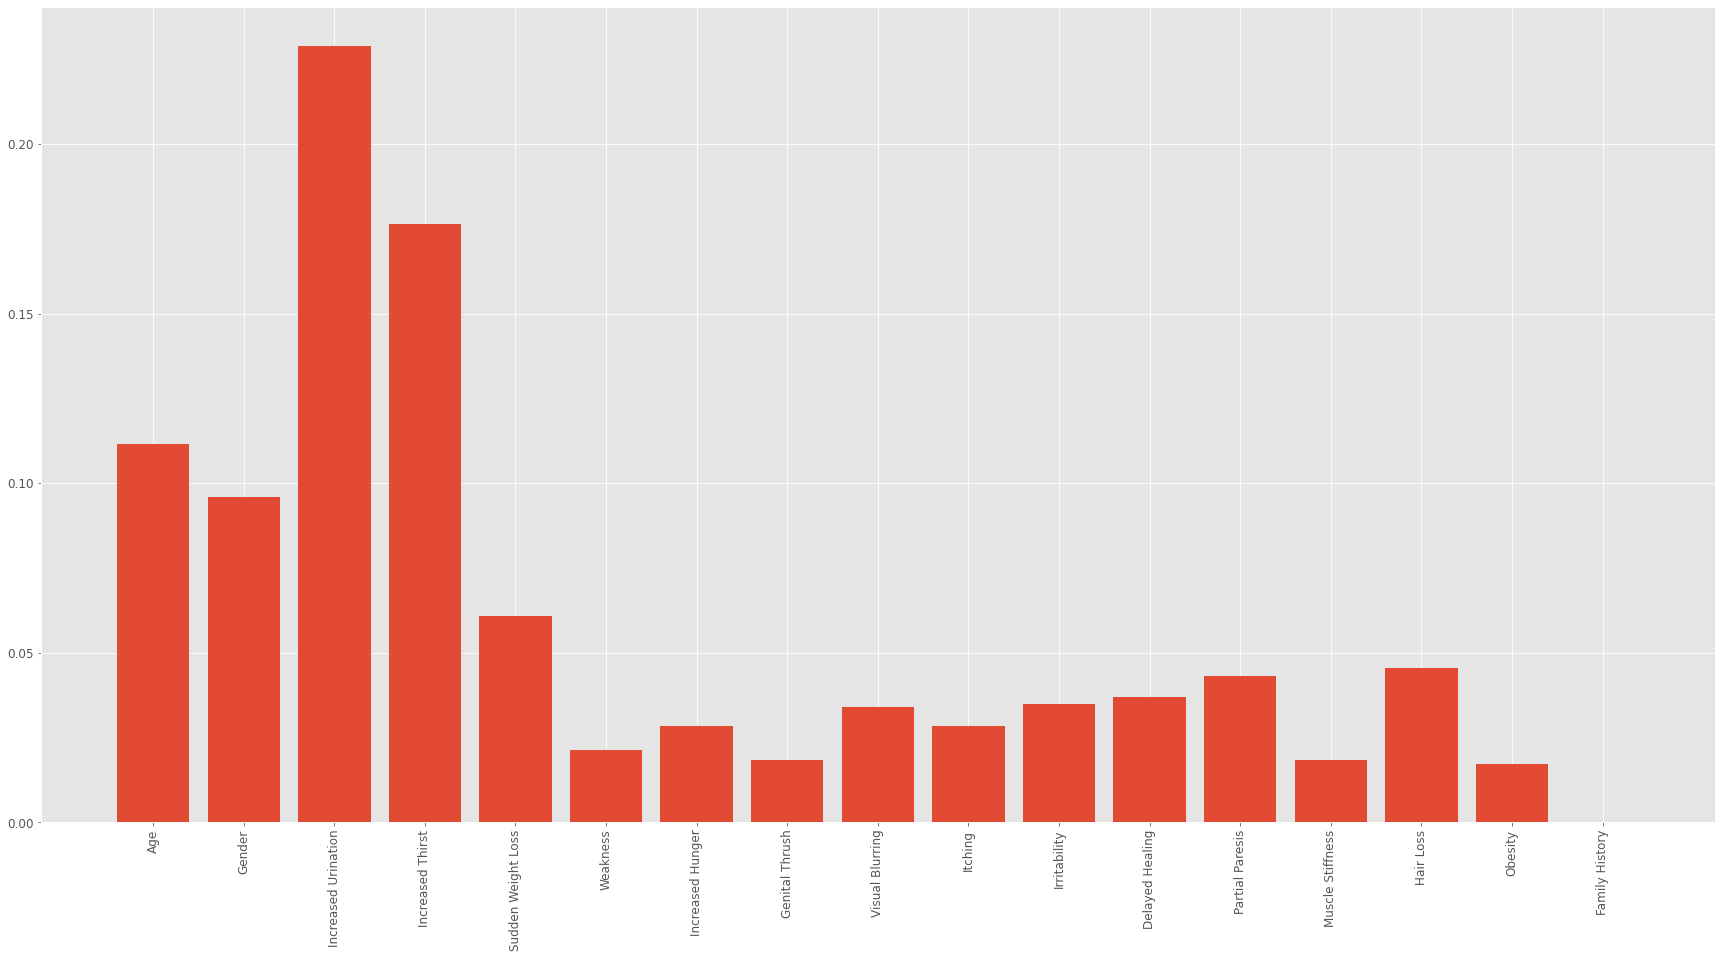

In [898]:
features_names = pd.concat([df_clean.iloc[:,0:df_clean.columns.get_loc("Diagnosis")],df_clean.iloc[:,df_clean.columns.get_loc("Diagnosis")+1:]], axis= 1).columns.values
fig,axes = plt.subplots(1,1,figsize=(30,15))
axes.bar(np.arange(len(w))+1,w,tick_label=features_names)
plt.xticks(rotation="vertical")

**i. What are the 2 most important features according to the random forest.**

**ii. Does this match up exactly with the feature exploration you did?**

i.  The most 2 important features according to the random forest are: 1) Increased Urination 2) Increased Thirst

ii. Yes, it does. according to the feature exploration as we mentioned in question 3 these are the best predictive features. According to the graph above we can see that these features are the highest ones. It makes sense because Random Forest displays the features relied on their importance as a kind of feature selection method.

 # **Question 7**
 In this part we use PCA for dimension reduction

In [900]:
n_components = 2
pca = PCA(n_components=n_components,whiten=True)


# apply PCA transformation using scaleing 
X_tr_pca = pca.fit_transform(x_tr)
X_tst_pca = pca.transform(x_tst)
print('{:.2f}% of data information was conserved.'.format(100*np.sum(pca.explained_variance_ratio_)))

pca_without_scal = PCA(n_components=n_components,whiten=True)
# without scaleing

X_train_pca = pca_without_scal.fit_transform(X_train_0_1)
X_test_pca = pca_without_scal.transform(X_test_0_1)
print('{:.2f}% of data information was conserved.'.format(100*np.sum(pca_without_scal.explained_variance_ratio_)))

37.18% of data information was conserved.
98.47% of data information was conserved.


Theoretically, the PCA supposed to find the biggest variance between features and in our case of binary data, it is not the most suitable algoeithm. Anyway, we can see scaling the values the PCA conserves much less data.

In [907]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Positive','Negative'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

Let's find out how seperable the train and test data, with and without scaling:

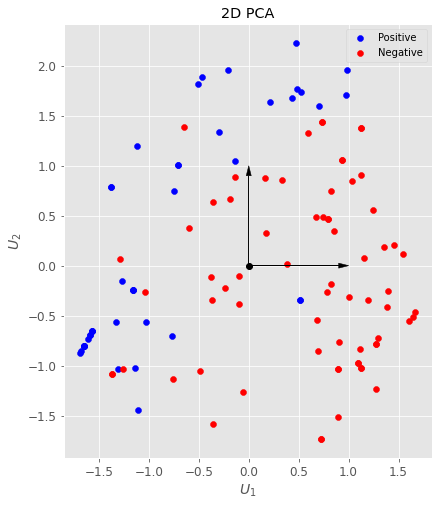

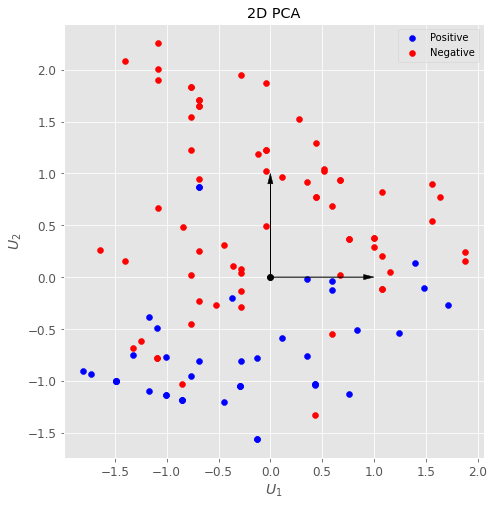

In [908]:
plt_2d_pca(X_tst_pca,y_test_0_1)
plt_2d_pca(X_test_pca,y_test_0_1)



**How separable is your data when reduced to just two features?**

It seems like the data is seperable but not in 100%. We can't notice a big difference between scaling and unscaling.

In the last part we run our previous models after PCA reducing:

In [909]:
log_reg = LogisticRegression()
# only 2 best features
best_feat_name =['Increased Urination', 'Increased Thirst']
best_features_idx_1 = list(features_names).index(best_feat_name[0])
best_features_idx_2 = list(features_names).index(best_feat_name[1])

pipe_no_pca_lg = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
X_feature_selection = X_train_0_1[:,best_features_idx_1:best_features_idx_2+1]
pipe_no_pca_lg.fit(X_feature_selection, y_train_0_1)

print('2 best features only, LG score on the test set is {:.2f}'.format(pipe_no_pca_lg.score(X_test_0_1[:,best_features_idx_1:best_features_idx_2+1],y_test_0_1)))

pipe_no_pca_svm = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
pipe_no_pca_svm.fit(X_feature_selection, y_train_0_1)

print('2 best features only, SVM score on the test set is {:.2f}'.format(pipe_no_pca_svm.score(X_test_0_1[:,best_features_idx_1:best_features_idx_2+1],y_test_0_1)))
# PCA
pca = PCA(n_components=2)
pipe_pca_lg = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('logistic', log_reg)])
pipe_pca_lg.fit(X_train_0_1, y_train_0_1)
print('The score on the test set with scaler  + PCA preprocessing, and LG model is {:.2f}'.format(pipe_pca_lg.score(X_test_0_1,y_test_0_1)))

pipe_pca_no_scal_lg = Pipeline(steps=[('pca', pca), ('logistic', log_reg)])
pipe_pca_no_scal_lg.fit(X_train_0_1, y_train_0_1)
print('The score on the test set with PCA preprocessing, and LG model is {:.2f}'.format(pipe_pca_no_scal_lg.score(X_test_0_1,y_test_0_1)))

pipe_pca_svm = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('svm', svc)])
pipe_pca_svm.fit(X_train_0_1, y_train_0_1)
print('The score on the test set with scaler  + PCA preprocessing, and SVM model is {:.2f}'.format(pipe_pca_svm.score(X_test_0_1,y_test_0_1)))

pipe_pca_no_scal_svm = Pipeline(steps=[('pca', pca), ('svm', svc)])
pipe_pca_no_scal_svm.fit(X_train_0_1, y_train_0_1)
print('The score on the test set with PCA preprocessing, and SVM model is {:.2f}'.format(pipe_pca_no_scal_svm.score(X_test_0_1,y_test_0_1)))
#------------------------------------------------------------------------------

2 best features only, LG score on the test set is 0.83
2 best features only, SVM score on the test set is 0.83
The score on the test set with scaler  + PCA preprocessing, and LG model is 0.85
The score on the test set with PCA preprocessing, and LG model is 0.83
The score on the test set with scaler  + PCA preprocessing, and SVM model is 0.89
The score on the test set with PCA preprocessing, and SVM model is 0.81


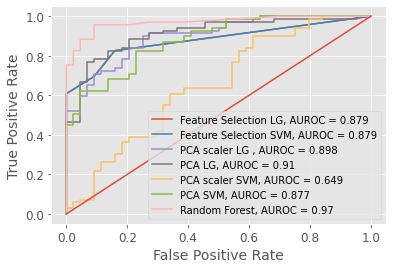

In [910]:
classifiers = [pipe_no_pca_lg,pipe_no_pca_svm,pipe_pca_lg,pipe_pca_no_scal_lg,pipe_pca_svm,pipe_pca_no_scal_svm,rfc]
roc_score = []
plt.figure()
ax = plt.gca()
X_test_selection = X_test_0_1[:,best_features_idx_1:best_features_idx_2+1]
for clf_idx,clf in enumerate(classifiers):
    if clf_idx==0 or clf_idx==1:
            plot_roc_curve(clf, X_test_selection, y_test_0_1, ax=ax)
            roc_score.append(np.round_(roc_auc_score(y_test_0_1, clf.predict_proba(X_test_selection)[:,1]), decimals=3))
    else:
        plot_roc_curve(clf, X_test_0_1, y_test_0_1, ax=ax)
        roc_score.append(np.round_(roc_auc_score(y_test_0_1, clf.predict_proba(X_test_0_1)[:,1]), decimals=3))
ax.plot(np.linspace(0,1,X_test_0_1.shape[0]),np.linspace(0,1,X_test_0_1.shape[0]))
plt.legend(('Feature Selection LG, AUROC = '+str(roc_score[0]),'Feature Selection SVM, AUROC = '+str(roc_score[1]),
            'PCA scaler LG , AUROC = '+str(roc_score[2]),'PCA LG, AUROC = '+str(roc_score[3]),
            'PCA scaler SVM, AUROC = '+str(roc_score[4]),'PCA SVM, AUROC = '+str(roc_score[5]),
           'Random Forest, AUROC = '+str(roc_score[6])))

      

**What performs better? 2 features of the reduced dimensionality.**

According to the AUROC graph above we can see that dimensionality reduction by PCA works better, beacuase the area under the graph is the more close to 1 than the feature selection.
If we ignore the PCA, the Random Forest performed best.